# Get Uniprot IDS for influenza
## Christian Roncal Cmsc499a Dr. Leiserson

In [1]:
import os 
import pandas as pd
import numpy as np
from utils import *
import re

In [2]:
os.listdir()

['full_train.csv',
 'make_matrix.py',
 'fullmatrix_getprots.ipynb',
 'utils.py',
 'hepatitis_c_processing.ipynb',
 'hepc_interactions_full.csv',
 'dataprocessing_playground.ipynb',
 'ebola_interactions_full.csv',
 'makesingletasks.ipynb',
 'classes.pkl',
 'influenza',
 'ebola',
 'influenza_a_processing-Copy1.ipynb',
 'flustrains.txt',
 '.ipynb_checkpoints',
 'flu_interactions_full.csv',
 'D.pkl',
 'hepc',
 '__pycache__',
 'hepc.fasta',
 'uniprots',
 'ebola_processing.ipynb',
 'conjoint_featurizer_playground.ipynb']

# 1 load data

In [3]:
flu_csv = './influenza/flu_phi.csv'

In [4]:
fludf = pd.read_csv(flu_csv, index_col=0)

In [5]:
fludf.head()

,Pathogen,Taxonomy ID,virusUprot,Pathogen Protein,humanUprot,Human Protein,Experimental Method,Pubmed ID
0,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03433,PA_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
1,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03466,NCAP_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
2,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03428,PB2_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
3,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03485,M1_I34A1,P15311,EZRI_HUMAN,anti bait coimmunoprecipitation,17022977
4,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03485,M1_I34A1,P11142,HSP7C_HUMAN,anti bait coimmunoprecipitation,17022977


In [6]:
len(fludf['Pathogen'].unique()) #not all of this will be of interest

526

# 2 Extract relevant strains

Use regex to get strains we're interested in: H1N1|H3N2|H5N1|H7N3

In [7]:
regex = 'H1N1|H3N2|H5N1|H7N3'
fludf = regex_select(fludf, 'Pathogen', regex)

Pathogen H1N1|H3N2|H5N1|H7N3


In [8]:
fludf.head()

,Pathogen,Taxonomy ID,virusUprot,Pathogen Protein,humanUprot,Human Protein,Experimental Method,Pubmed ID
0,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03433,PA_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
1,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03466,NCAP_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
2,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03428,PB2_I34A1,P49736,MCM2_HUMAN,anti bait coimmunoprecipitation,17932485
3,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03485,M1_I34A1,P15311,EZRI_HUMAN,anti bait coimmunoprecipitation,17022977
4,Influenza A virus STRAIN A / PUERTO RICO / 8 /...,211044,P03485,M1_I34A1,P11142,HSP7C_HUMAN,anti bait coimmunoprecipitation,17022977


In [9]:
len(fludf['Pathogen'].unique())

52

# 3 Get virus|human uniprots of interactions

get a df with cols virus uniprot and human uniprot for matrix interaction processing.

In [10]:
# drop cols we don't need
fludf = removeObsoletes(fludf[['virusUprot', 'humanUprot']])

In [11]:
fludf = fludf.replace(to_replace='B4UPB0', value='T2AAS6')

In [12]:
fludf = fludf.replace(to_replace='B4UPB2', value='I6TAG8')

In [13]:
fludf.head()

,virusUprot,humanUprot
0,P03433,P49736
1,P03466,P49736
2,P03428,P49736
3,P03485,P15311
4,P03485,P11142


In [14]:
# save current interaction matrix
fludf.to_csv('flu_interactions_full.csv', index=False)

In [15]:
pd.read_csv('flu_interactions_full.csv').head()

,virusUprot,humanUprot
0,P03433,P49736
1,P03466,P49736
2,P03428,P49736
3,P03485,P15311
4,P03485,P11142


# rank

In [16]:
ranked_fludf = rank_by_interactions(fludf, 20)

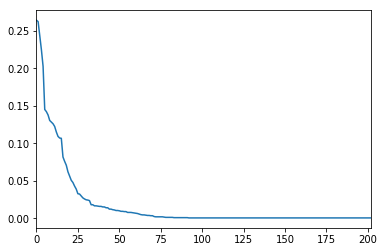

In [26]:
ranked_fludf['ratio'].plot.line()

In [27]:
top28 = ranked_fludf[:28]

In [28]:
top28['ratio'].mean()

0.11396615852061397

In [29]:
top16 = ranked_fludf[:16]

In [30]:
top16['ratio'].mean()

0.16061606160616063

# Extract topX virus entries

In [19]:
top28_uniprots = top28['virus'].unique()

In [20]:
top16_uniprots = top16['virus'].unique()

In [21]:
top28_uniprots

array(['P03470', 'P05777', 'P05780', 'P15682', 'P03427', 'Q1K9H5',
       'P03496', 'P03454', 'P15659', 'P06821', 'P03430', 'P03428',
       'Q20MH8', 'P03431', 'B4URF7', 'P03468', 'P03508', 'P03452',
       'Q1K9H2', 'P03433', 'P03466', 'I6T1Z2', 'Q82506', 'O56264',
       'I6TAH8', 'Q20MH0', 'B4URE7', 'Q5EP28'], dtype=object)

In [23]:
top16_uniprots

array(['P03470', 'P05777', 'P05780', 'P15682', 'P03427', 'Q1K9H5',
       'P03496', 'P03454', 'P15659', 'P06821', 'P03430', 'P03428',
       'Q20MH8', 'P03431', 'B4URF7', 'P03468'], dtype=object)

In [29]:
top28_interactions = fludf[fludf['virusUprot'].apply((lambda x: x in top28_uniprots))]

In [30]:
len(top28_interactions['virusUprot'].unique())

28

In [31]:
top28_interactions.to_csv('flu_top28_interactions.csv')

In [ ]:
### top16_interactions = fludf[fludf['virusUprot'].apply((lambda x: x in top16_uniprots))]

In [34]:
len(top16_interactions['virusUprot'].unique())

16

In [25]:
top16_interactions.to_csv('flu_top16_interactions.csv')

NameError: name 'top16_interactions' is not defined